<a href="https://colab.research.google.com/github/omkar111999/omkar111999/blob/main/Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score


Done EDA on dataframe  to understand the correlation of the data sets 

In [ ]:
data = pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
data


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
data.shape


(10000, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.isna()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.describe()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


  DATA VISUALIZATIONS FOR IN DEPTH EDA 

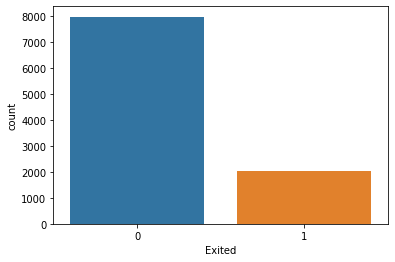

In [ ]:
sns.countplot(x = "Exited", data = data)
plt.show()
#In this we get a count for exited customer churn 

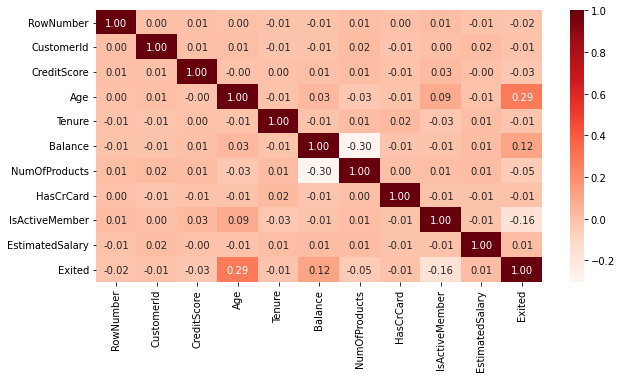

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))   
sns.heatmap(data.corr(), annot = True , fmt=".2f",ax=ax ,cmap = "Reds")
plt.show()

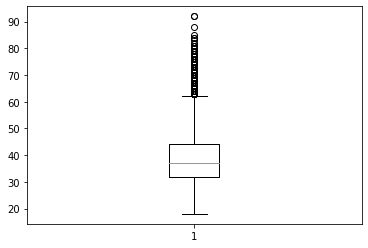

In [ ]:
#we have seen that age is high corelated to the data and the prediction of the churn 
plt.boxplot(data['Age'])
plt.show()


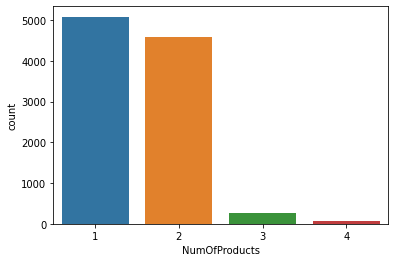

In [ ]:
sns.countplot(x = "NumOfProducts", data = data)
plt.show()

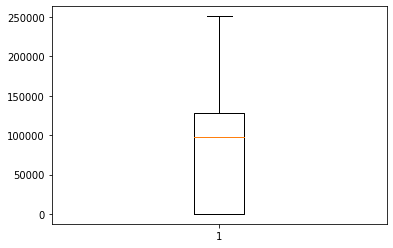

In [ ]:
plt.boxplot(data["Balance"])
plt.show()

##we will do some featuring engineering or one hot encoding to get the converted categorical data into dummy or indicator variables.

In [ ]:
data = pd.get_dummies(data, columns= ["Geography "])
data = pd.get_dummies(data, columns= ["Gender"])
data = pd.get_dummies(data, columns= ["NumOfProducts"])
#we have produces some dummies of the paticular rows so that we can seprated it mor effectively 


KeyError: ignored

In [ ]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
print("Max : ", data['Age'].max())
print("Min : ", data['Age'].min())

Max :  92
Min :  18


In [ ]:
#dividing the age into 5 categories 
age_cat = [0 if i < 38 else 1 if i <42  else 2 if i < 45 else 3 if i < 60 else 4 for i in data["Age"]]
data["Age_Cat"] = age_cat

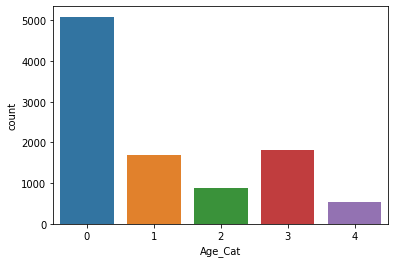

In [ ]:
sns.countplot(x = "Age_Cat", data = data)
plt.show()

adding the dummies data into the data set as category to find out the exited or existing coustomer 


In [ ]:
data["Age_Cat"] = data["Age_Cat"].astype("category")
data = pd.get_dummies(data, columns=["Age_Cat"])
data.head(20)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Cat_0,Age_Cat_1,Age_Cat_2,Age_Cat_3,Age_Cat_4
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,1,0,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,0,0,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,1,0,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1,0,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,0,0,1,0,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,0,0,1,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,0,0,0,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,0,1,0,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,1,0,0,0,0


categorical credit score

In [ ]:
print("Max age: ", data['CreditScore'].max())
print("Max age: ", data['CreditScore'].min())
print("Mean age: ", data['CreditScore'].mean())
##in this we are as we had done in age and convert in to the categorical columns

Max age:  850
Max age:  350
Mean age:  650.5288


In [ ]:
credit_cat = [0 if i < 450 else 1 if i <670  else 2 for i in data["CreditScore"]]
data["CreditScore_Cat"] = credit_cat
#add creditscore_cat in the data set

In [ ]:
sns.countplot(x = "CreditScore_Cat", data = data)
plt.show()#this gives us the count of the categorical creditscore of cat

ValueError: ignored

In [ ]:
data["CreditScore_Cat"] = data["CreditScore_Cat"].astype("category")
data = pd.get_dummies(data, columns=["CreditScore_Cat"])
data.head(15)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,EstimatedSalary,Exited,Age_Cat_0,Age_Cat_1,Age_Cat_2,Age_Cat_3,Age_Cat_4,CreditScore_Cat_0,CreditScore_Cat_1,CreditScore_Cat_2
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,...,101348.88,1,0,0,1,0,0,0,1,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,...,112542.58,0,0,1,0,0,0,0,1,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,...,113931.57,1,0,0,1,0,0,0,1,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,...,93826.63,0,0,1,0,0,0,0,0,1
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,...,79084.10,0,0,0,1,0,0,0,0,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,...,149756.71,1,0,0,1,0,0,0,1,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,...,10062.80,0,0,0,0,1,0,0,0,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,...,119346.88,1,1,0,0,0,0,1,0,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,...,74940.50,0,0,0,1,0,0,0,1,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,...,71725.73,0,1,0,0,0,0,0,0,1


Drop non-necessary row from the data set -> RowNumber, CustomerId.|

Drop object data type from the data -> Surname.|

Drop no longer necessary row which is manipulaed by us in the data -> CreditScore, Age.|

In [ ]:
data.drop(labels = ["RowNumber", "CustomerId","Surname","CreditScore","Age"], axis = 1, inplace = True) 
data.head()

,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Cat_0,Age_Cat_1,Age_Cat_2,Age_Cat_3,Age_Cat_4,CreditScore_Cat_0,CreditScore_Cat_1,CreditScore_Cat_2
0,France,Female,2,0.00,1,1,1,101348.88,1,0,0,1,0,0,0,1,0
1,Spain,Female,1,83807.86,1,0,1,112542.58,0,0,1,0,0,0,0,1,0
2,France,Female,8,159660.80,3,1,0,113931.57,1,0,0,1,0,0,0,1,0
3,France,Female,1,0.00,2,0,0,93826.63,0,0,1,0,0,0,0,0,1
4,Spain,Female,2,125510.82,1,1,1,79084.10,0,0,0,1,0,0,0,0,1


In [ ]:
data.drop(labels = ["Tenure", "HasCrCard","EstimatedSalary"], axis = 1, inplace = True)
data.head()

,Geography,Gender,Balance,NumOfProducts,IsActiveMember,Exited,Age_Cat_0,Age_Cat_1,Age_Cat_2,Age_Cat_3,Age_Cat_4,CreditScore_Cat_0,CreditScore_Cat_1,CreditScore_Cat_2
0,France,Female,0.00,1,1,1,0,0,1,0,0,0,1,0
1,Spain,Female,83807.86,1,1,0,0,1,0,0,0,0,1,0
2,France,Female,159660.80,3,0,1,0,0,1,0,0,0,1,0
3,France,Female,0.00,2,0,0,0,1,0,0,0,0,0,1
4,Spain,Female,125510.82,1,1,0,0,0,1,0,0,0,0,1


Data modeling and Data prepared for train test split


In [ ]:
x_data = data.drop(["Exited"],axis=1)
y_data = data["Exited"].values

train test split 

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size = 0.33,random_state=42)

Doing standardization using standard scaler 



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns.values)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns.values)

ValueError: ignored

In [ ]:
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (6700, 13)
x test:  (3300, 13)
y train:  (6700,)
y test:  (3300,)


Building of an Artificial Neural Network (ANN)


In [ ]:
classifier=Sequential()
classifier.add(Dense(10, activation = 'relu' , input_dim = x_train.shape[1])),

In [ ]:



classifier.add(Dense(8 , activation = 'relu')),
classifier.add(Dense(1 , activation = 'sigmoid'))


classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = classifier.fit(x_train, y_train, batch_size = 25, epochs = 100,verbose = 1)

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

prediction on training data set.

In [ ]:
y_pred = classifier.predict(x_train)
score, acc = classifier.evaluate(x_train, y_train,batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)

prediciton on traning data set with confustion matrix 

In [ ]:
y_pred = (y_pred > 0.5)*1

from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_train,y_pred)

sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap='Reds')
plt.show()

prediction on test dataset 


In [ ]:
y_pred = classifier.predict(x_test)
score, acc = classifier.evaluate(x_test, y_test,batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

prediciton on test data set with confustion matrix

In [ ]:
y_pred = (y_pred > 0.5)*1

cf_matrix = confusion_matrix(y_test,y_pred)

sns.heatmap(cf_matrix, annot= false , fmt='.0f', cmap='Reds')
plt.show()

NameError: ignored